c:\Users\Akshay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 60.00%
Precision: 60.67%


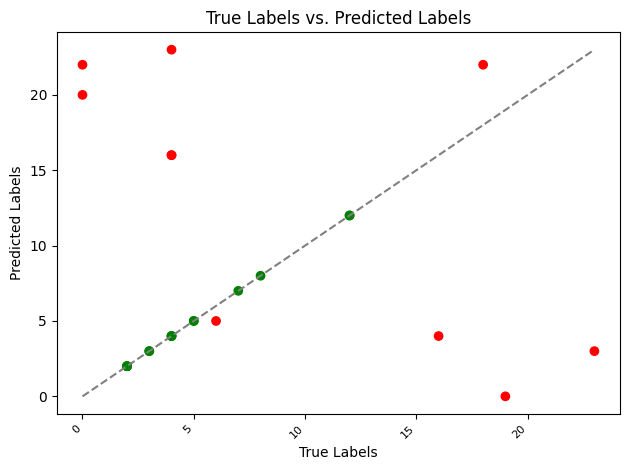

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score
import xgboost as xgb

# Load the dataset
file_path = 'your_dataset.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)
# Encode the categorical target variable
le = LabelEncoder()
df['Disease'] = le.fit_transform(df['Disease'])

# Split the dataset into features and target variable
X = df[['Refractive Index']]
y = df['Disease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost model
model = xgb.XGBClassifier(objective="multi:softmax", num_class=len(df['Disease'].unique()))

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")

import matplotlib.pyplot as plt
# Plotting True Labels vs. Predicted Labels with improved horizontal axis labels
plt.scatter(y_test, y_pred, c=['green' if true_label == pred_label else 'red' for true_label, pred_label in zip(y_test, y_pred)])
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray')  # Diagonal line

# Improve horizontal axis labels
plt.xticks(rotation=45, fontsize=8, ha='right')  # Rotate labels at a 45-degree angle, adjust font size, and align to the right
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('True Labels vs. Predicted Labels')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Generate confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# from sklearn.metrics import roc_curve, auc
# import scikitplot as skplt


# # Convert predicted probabilities to predicted classes
# y_pred_classes = model.predict(X_test)

# # Plot the distribution
# plt.figure(figsize=(8, 6))
# sns.countplot(x=y_pred_classes, palette='viridis', label='Predicted')
# sns.countplot(x=y_test, palette='muted', label='True', alpha=0.7)
# plt.title('Comparison of True and Predicted Classes')
# plt.legend()
# plt.show()

# from sklearn.metrics import precision_recall_curve
# import matplotlib.pyplot as plt


# # Plot feature importance
# xgb.plot_importance(model)
# plt.title('Feature Importance')
# plt.show()

# # Visualize the distribution of the target variable
# sns.countplot(x='Disease', data=df)
# plt.title('Distribution of Target Variable')
# plt.show()


# # Add the target variable for better insights
# df['Target'] = le.inverse_transform(y)

# # Plot Pair Plots
# sns.pairplot(df, hue='Target', diag_kind='kde')
# plt.title('Pair Plots')
# plt.show()

# from sklearn.preprocessing import LabelBinarizer
# from sklearn.calibration import calibration_curve

# # Convert multiclass labels to binary labels
# lb = LabelBinarizer()
# binary_y_test = lb.fit_transform(y_test)

# # Calculate calibration curve
# prob_true, prob_pred = calibration_curve(binary_y_test[:, 1], model.predict_proba(X_test)[:, 1], n_bins=10)

# # Plot Calibration Curve
# plt.figure(figsize=(8, 6))
# plt.plot(prob_pred, prob_true, marker='.', label='XGBoost')
# plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
# plt.title('Calibration Curve')
# plt.xlabel('Mean Predicted Probability')
# plt.ylabel('Fraction of Positives')
# plt.legend()
# plt.show()




In [ ]:
.402
# ,C Z3W